# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [72]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

**Zadanie Domowe **   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

3. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) 


In [82]:
array_of_A = []
array_of_b = []
m = [10, 20, 50, 100, 1000]

for value in m:
    array_of_A.append((main.random_matrix_Ab(value))[0])
    array_of_b.append((main.random_matrix_Ab(value))[1])

***Zadanie 1***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

5. Zbadać czas wykonania obliczeń przy pomocy funkcji *timeint*
  

16.4 µs ± 6.56 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
The slowest run took 5.89 times longer than the fastest. This could mean that an intermediate result is being cached.
161 µs ± 113 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
535 µs ± 211 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.34 ms ± 945 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
The slowest run took 5.48 times longer than the fastest. This could mean that an intermediate result is being cached.
74.1 ms ± 41.7 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


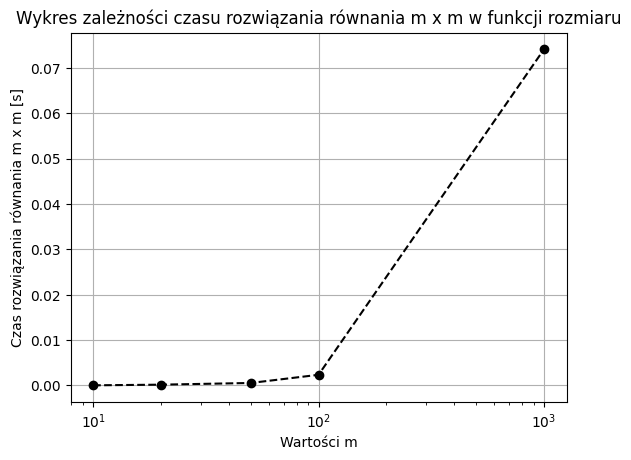

Wartość normy residuum dla m = 10 to 3.4399002279594067e-15
Wartość normy residuum dla m = 20 to 1.5332336735014057e-14
Wartość normy residuum dla m = 50 to 1.366353059602962e-13
Wartość normy residuum dla m = 100 to 4.0834503922089917e-13
Wartość normy residuum dla m = 1000 to 1.0643251501600453e-11

Współczynnik uwarunkowania macierzy dla m = 10 to 33.81476120992248
Współczynnik uwarunkowania macierzy dla m = 20 to 143.47309345115931
Współczynnik uwarunkowania macierzy dla m = 50 to 388.91425398936866
Współczynnik uwarunkowania macierzy dla m = 100 to 2026.8673359396362
Współczynnik uwarunkowania macierzy dla m = 1000 to 79193.47891656177


In [83]:
array_of_x = []
average = []
stdev = []

# Ad. 5.

for index, _ in enumerate(array_of_A):
    saved_timing = %timeit -r 5 -n 10 -o np.linalg.solve(array_of_A[index], array_of_b[index])
    average.append(saved_timing.average)
    array_of_x.append(np.linalg.solve(array_of_A[index], array_of_b[index]))

ax = plt.subplot()
ax.plot(m, average, 'k--o')
ax.set(xlabel='Wartości m', ylabel='Czas rozwiązania równania m x m [s]')
plt.title('Wykres zależności czasu rozwiązania równania m x m w funkcji rozmiaru')
plt.semilogx()
plt.grid()
plt.show()

norm_of_residuum = []

for index, _ in enumerate(array_of_x):
    norm_of_residuum.append(main.residual_norm(np.array(array_of_A[index]), np.array(array_of_x[index]), 
                                                np.array(array_of_b[index])))

for index, value in enumerate(m):
    print('Wartość normy residuum dla m =', value, 'to', norm_of_residuum[index])

cond_of_A = []

for value in array_of_A:
    cond_of_A.append(np.linalg.cond(value))

print()
for index, value in enumerate(m):
    print('Współczynnik uwarunkowania macierzy dla m =', value, 'to', cond_of_A[index])

Ad. 4.
Zarówno zakres wartości jak i wymiar macierzy maja wpływ na jakość i dokładność otrzymanych wyników. Wraz ze wzrostem rozmiaru macierzy rośnie wartość normy residuum oraz wartość współczynnika uwarunkowania danej macierzy. Nie pokrywa się to idealnie z moimi wynikami dlatego, że moje macierze są generowane losowo co trochę zakłóca otrzymane wyniki.

***Zadanie 2***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [38]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.48074070e+00 1.29219214e-16 7.69636854e-34]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:


- wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej, np:

In [39]:
S1 = np.logspace(100, 1, num=3)

- wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych, np.:

In [40]:
S2 = np.logspace(100, 1, num=3)
S2[0] = S2[0]+100

- wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 

In [41]:
S3 = np.logspace(100, 1, num=3)
S3[-1] = S3[0]-100



W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak w przykładzie:
 

In [42]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])
U,S,V = nplin.svd(A)

A1 = np.dot(U * S1, V)
A2 = np.dot(U * S2, V)
A3 = np.dot(U * S3, V)
print('Macierz pierwotna:')
print(A)

print('Macierz na podstawie wartości S1:')
print(A1)

print('Macierz na podstawie wartości S2:')
print(A2)

print('Macierz na podstawie wartości S3:')
print(A3)

Macierz pierwotna:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz na podstawie wartości S1:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S2:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S3:
[[ 1.54303350e+99  3.08606700e+99  4.62910050e+99]
 [ 8.26691934e+99  1.09871014e+99  3.71270979e+99]
 [-5.18085234e+99  5.07342386e+99  5.54549121e+99]]




3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




In [84]:
# Ad. 3.
array_of_A_with_swapped_sing_values = []

for index, value in enumerate(m):
    array_of_A_with_swapped_sing_values.append((main.create_matrix_from_A(array_of_A[index], main.log_sing_value(value, 1, 100)),
                                                main.create_matrix_from_A(array_of_A[index], main.order_sing_value(value, site='gre')), 
                                                main.create_matrix_from_A(array_of_A[index], main.order_sing_value(value, site='low'))))

cond_swapped = []
norm_of_residuum_swapped = []
for index, value in enumerate(m):
    A1 = array_of_A_with_swapped_sing_values[index][0]
    A2 = array_of_A_with_swapped_sing_values[index][1]
    A3 = array_of_A_with_swapped_sing_values[index][2]
    cond1 = np.linalg.cond(A1)
    cond2 = np.linalg.cond(A2)
    cond3 = np.linalg.cond(A3)
    norm1 = main.residual_norm(A1, np.linalg.solve(A1, array_of_b[index]), array_of_b[index])
    norm2 = main.residual_norm(A2, np.linalg.solve(A2, array_of_b[index]), array_of_b[index])
    norm3 = main.residual_norm(A3, np.linalg.solve(A3, array_of_b[index]), array_of_b[index])
    cond_swapped.append((cond1, cond2, cond3))
    norm_of_residuum_swapped.append((norm1, norm2, norm3))
    print('Dla m =', value, 'współczynnik uwarunkowania macierzy z podmienionym wektorem S1 to', cond1)
    print('Dla m =', value, 'współczynnik uwarunkowania macierzy z podmienionym wektorem S2 to', cond2)
    print('Dla m =', value, 'współczynnik uwarunkowania macierzy z podmienionym wektorem S3 to', cond3)
    print()


Dla m = 10 współczynnik uwarunkowania macierzy z podmienionym wektorem S1 to 7.276420257596379e+18
Dla m = 10 współczynnik uwarunkowania macierzy z podmienionym wektorem S2 to 2495.874004845955
Dla m = 10 współczynnik uwarunkowania macierzy z podmienionym wektorem S3 to 4.27410216162511

Dla m = 20 współczynnik uwarunkowania macierzy z podmienionym wektorem S1 to 1.1623439721670801e+19
Dla m = 20 współczynnik uwarunkowania macierzy z podmienionym wektorem S2 to 3257.5331158732815
Dla m = 20 współczynnik uwarunkowania macierzy z podmienionym wektorem S3 to 56.77707694282222

Dla m = 50 współczynnik uwarunkowania macierzy z podmienionym wektorem S1 to 3.925729803173506e+19
Dla m = 50 współczynnik uwarunkowania macierzy z podmienionym wektorem S2 to 16855.075891157332
Dla m = 50 współczynnik uwarunkowania macierzy z podmienionym wektorem S3 to 43.555248412734656

Dla m = 100 współczynnik uwarunkowania macierzy z podmienionym wektorem S1 to 1.0106073563695561e+20
Dla m = 100 współczynnik u

Ad. 4.
Nie musimy obliczać macierzy A, ponieważ współczynnik uwarunkowania macierzy to stosunek największej do najmniejszej wartości singularnej.

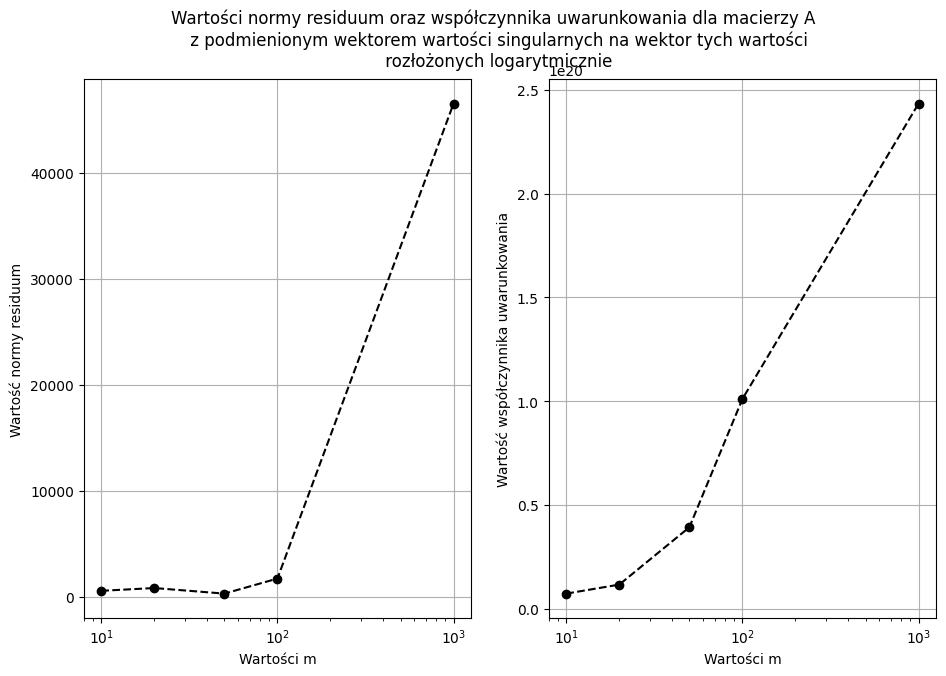

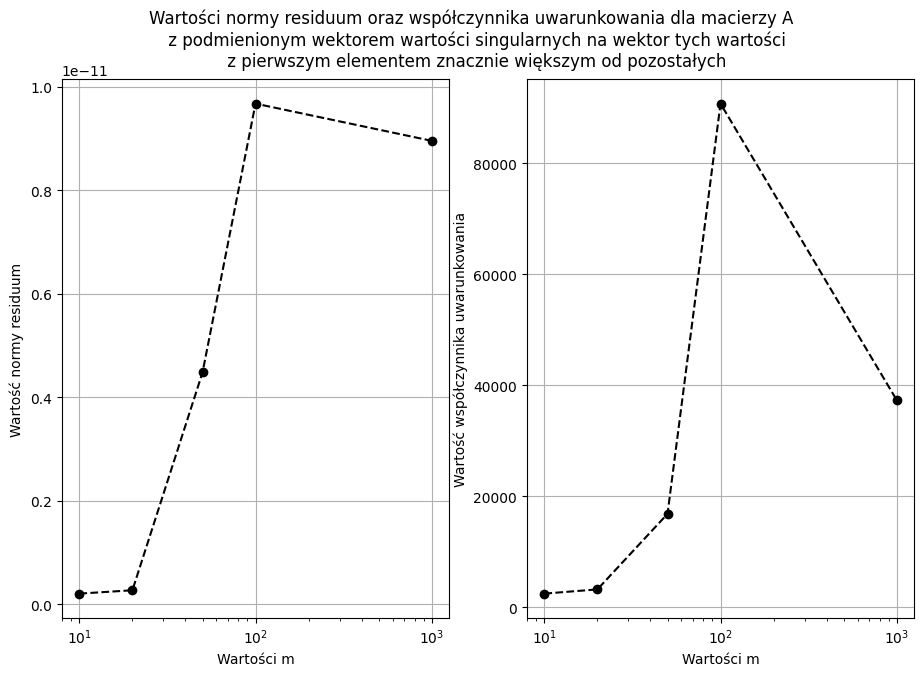

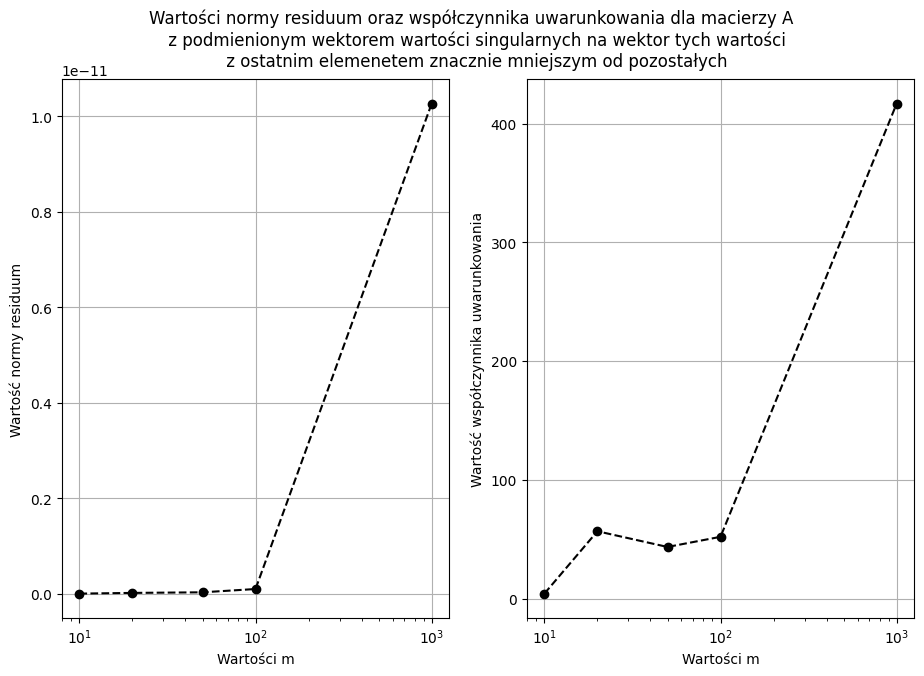

In [89]:
norm_log_sing_values = []
norm_order_sing_values_gre = []
norm_order_sing_values_low = []
cond_log_sing_values = []
cond_order_sing_values_gre = []
cond_order_sing_values_low = []

for index in range(5):
    norm_log_sing_values.append(norm_of_residuum_swapped[index][0])
    norm_order_sing_values_gre.append(norm_of_residuum_swapped[index][1])
    norm_order_sing_values_low.append(norm_of_residuum_swapped[index][2])
    cond_log_sing_values.append(cond_swapped[index][0])
    cond_order_sing_values_gre.append(cond_swapped[index][1])
    cond_order_sing_values_low.append(cond_swapped[index][2])

plt.figure(figsize=(11, 7))
ax= plt.subplot(1, 2, 1)
ax.plot(m, norm_log_sing_values, 'k--o')
ax.set(xlabel='Wartości m', ylabel='Wartość normy residuum')
plt.grid()
plt.semilogx()

ax= plt.subplot(1, 2, 2)
ax.plot(m, cond_log_sing_values, 'k--o')
ax.set(xlabel='Wartości m', ylabel='Wartość współczynnika uwarunkowania')
plt.grid()
plt.semilogx()
plt.suptitle(t='Wartości normy residuum oraz współczynnika uwarunkowania dla macierzy A \n z podmienionym wektorem wartości singularnych na wektor tych wartości\n rozłożonych logarytmicznie')
plt.show()

plt.figure(figsize=(11, 7))
ax= plt.subplot(1, 2, 1)
ax.plot(m, norm_order_sing_values_gre, 'k--o')
ax.set(xlabel='Wartości m', ylabel='Wartość normy residuum')
plt.grid()
plt.semilogx()

ax= plt.subplot(1, 2, 2)
ax.plot(m, cond_order_sing_values_gre, 'k--o')
ax.set(xlabel='Wartości m', ylabel='Wartość współczynnika uwarunkowania')
plt.grid()
plt.semilogx()
plt.suptitle(t='Wartości normy residuum oraz współczynnika uwarunkowania dla macierzy A \n z podmienionym wektorem wartości singularnych na wektor tych wartości\n z pierwszym elementem znacznie większym od pozostałych')
plt.show()

plt.figure(figsize=(11, 7))
ax= plt.subplot(1, 2, 1)
ax.plot(m, norm_order_sing_values_low, 'k--o')
ax.set(xlabel='Wartości m', ylabel='Wartość normy residuum')
plt.grid()
plt.semilogx()

ax= plt.subplot(1, 2, 2)
ax.plot(m, cond_order_sing_values_low, 'k--o')
ax.set(xlabel='Wartości m', ylabel='Wartość współczynnika uwarunkowania')
plt.grid()
plt.semilogx()
plt.suptitle(t='Wartości normy residuum oraz współczynnika uwarunkowania dla macierzy A \n z podmienionym wektorem wartości singularnych na wektor tych wartości\n z ostatnim elemenetem znacznie mniejszym od pozostałych')
plt.show()

Wnioski:

Laboratorium dosyć dogłębnie zapoznało mnie z metodami rozwiązywania układów równań n x n. Przyjrzałem się z bliższa rozkładowi SVD oraz dowiedziałem się jakie znaczenie mają wartości singularne macierzy. Dodatkowo utrwaliłem wiedzę dotyczącą generowania wykresów przy pomocy biblioteki matplotlib.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)